In [20]:
!pip install yfinance
import yfinance as yf


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [21]:
data = yf.download(tickers="MSFT")

data

/tmp/ipykernel_3186/2319925096.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers="MSFT")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
1986-03-13,0.059598,0.062259,0.054277,0.054277,1031788800
1986-03-14,0.061726,0.062791,0.059598,0.059598,308160000
1986-03-17,0.062791,0.063323,0.061726,0.061726,133171200
1986-03-18,0.061194,0.063323,0.060662,0.062791,67766400
1986-03-19,0.060130,0.061726,0.059598,0.061194,47894400
...,...,...,...,...,...
2025-06-03,462.970001,464.140015,460.859985,461.470001,15743800
2025-06-04,463.869995,465.690002,463.019989,464.000000,14162700


In [22]:
data.to_csv('/workspaces/Python_repository/MFST.CSV')

In [23]:
# df_raw = pd.read_csv('/workspaces/Python_repository/MFST.CSV')
# print(df_raw.columns)

In [24]:
MS = yf.download(tickers="MFST", group_by='ticker', auto_adjust=True)
df = yf.download("MSFT", group_by='ticker', auto_adjust=True)

MS

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MFST']: YFTzMissingError('possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Empty DataFrame
Columns: [(MFST, Open), (MFST, High), (MFST, Low), (MFST, Close), (MFST, Adj Close), (MFST, Volume)]
Index: []

In [25]:
import yfinance as yf

df = yf.download("MSFT", group_by='ticker', auto_adjust=True)

df

[*********************100%***********************]  1 of 1 completed


Ticker            MSFT                                                
Price             Open        High         Low       Close      Volume
Date                                                                  
1986-03-13    0.054277    0.062259    0.054277    0.059598  1031788800
1986-03-14    0.059598    0.062791    0.059598    0.061726   308160000
1986-03-17    0.061726    0.063323    0.061726    0.062791   133171200
1986-03-18    0.062791    0.063323    0.060662    0.061194    67766400
1986-03-19    0.061194    0.061726    0.059598    0.060130    47894400
...                ...         ...         ...         ...         ...
2025-06-03  461.470001  464.140015  460.859985  462.970001    15743800
2025-06-04  464.000000  465.690002  463.019989  463.869995    14162700
2025-06-05  464.959991  469.649994  464.029999  467.679993    20131700
2025-06-06  470.089996  473.339996  468.779999  470.380005    15278600
2025-06-09  469.679993  471.225006  468.899994  469.915009     1692121

[9887 rows x 5 columns]

In [26]:
df_ms = df.loc['2016-12-08':,:]

df_ms

Ticker            MSFT                                              
Price             Open        High         Low       Close    Volume
Date                                                                
2016-12-08   55.341827   55.594614   54.926538   55.080013  21220800
2016-12-09   55.233482   55.964754   55.188343   55.946697  27349400
2016-12-12   55.811279   56.244624   55.721000   56.127258  20198100
2016-12-13   56.425179   57.255756   56.190452   56.858524  35718900
2016-12-14   56.876585   57.282847   56.452267   56.587688  30352700
...                ...         ...         ...         ...       ...
2025-06-03  461.470001  464.140015  460.859985  462.970001  15743800
2025-06-04  464.000000  465.690002  463.019989  463.869995  14162700
2025-06-05  464.959991  469.649994  464.029999  467.679993  20131700
2025-06-06  470.089996  473.339996  468.779999  470.380005  15278600
2025-06-09  469.679993  471.225006  468.899994  469.915009   1692121

[2136 rows x 5 columns]

### Calculate the percentage daily difference for tomorrow

In [27]:
df_ms.MSFT.Close.pct_change() * 100

Date
2016-12-08         NaN
2016-12-09    1.573500
2016-12-12    0.322738
2016-12-13    1.302871
2016-12-14   -0.476333
                ...   
2025-06-03    0.216464
2025-06-04    0.194396
2025-06-05    0.821350
2025-06-06    0.577320
2025-06-09   -0.098855
Name: Close, Length: 2136, dtype: float64

In [28]:
df_ms.MSFT.Close.pct_change(-1) * 100

Date
2016-12-08   -1.549124
2016-12-09   -0.321699
2016-12-12   -1.286115
2016-12-13    0.478613
2016-12-14    0.159779
                ...   
2025-06-03   -0.194019
2025-06-04   -0.814659
2025-06-05   -0.574007
2025-06-06    0.098953
2025-06-09         NaN
Name: Close, Length: 2136, dtype: float64

In [29]:
df_ms['MSFT','Ch_tomorrow'] = df_ms.MSFT.Close.pct_change(-1) * 100 * -1

/tmp/ipykernel_3186/2377680742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ms['MSFT','Ch_tomorrow'] = df_ms.MSFT.Close.pct_change(-1) * 100 * -1


In [30]:
df_ms

Ticker            MSFT                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2016-12-08   55.341827   55.594614   54.926538   55.080013  21220800   
2016-12-09   55.233482   55.964754   55.188343   55.946697  27349400   
2016-12-12   55.811279   56.244624   55.721000   56.127258  20198100   
2016-12-13   56.425179   57.255756   56.190452   56.858524  35718900   
2016-12-14   56.876585   57.282847   56.452267   56.587688  30352700   
...                ...         ...         ...         ...       ...   
2025-06-03  461.470001  464.140015  460.859985  462.970001  15743800   
2025-06-04  464.000000  465.690002  463.019989  463.869995  14162700   
2025-06-05  464.959991  469.649994  464.029999  467.679993  20131700   
2025-06-06  470.089996  473.339996  468.779999  470.380005  15278600   
2025-06-09  469.679993  471.225006  468.899994  469.915009   1692121   

Ticker                  
Price      Ch_tomorrow  
Date                    
2016-12-08    1.549124  
2016-12-09    0.321699  
2016-12-12    1.286115  
2016-12-13   -0.478613  
2016-12-14   -0.159779  
...                ...  
2025-06-03    0.194019  
2025-06-04    0.814659  
2025-06-05    0.574007  
2025-06-06   -0.098953  
2025-06-09         NaN  

[2136 rows x 6 columns]

In [31]:
df_ms = df_ms.dropna().copy()

In [32]:
df_ms

Ticker            MSFT                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2016-12-08   55.341827   55.594614   54.926538   55.080013  21220800   
2016-12-09   55.233482   55.964754   55.188343   55.946697  27349400   
2016-12-12   55.811279   56.244624   55.721000   56.127258  20198100   
2016-12-13   56.425179   57.255756   56.190452   56.858524  35718900   
2016-12-14   56.876585   57.282847   56.452267   56.587688  30352700   
...                ...         ...         ...         ...       ...   
2025-06-02  457.140015  462.109985  456.890015  461.970001  16626500   
2025-06-03  461.470001  464.140015  460.859985  462.970001  15743800   
2025-06-04  464.000000  465.690002  463.019989  463.869995  14162700   
2025-06-05  464.959991  469.649994  464.029999  467.679993  20131700   
2025-06-06  470.089996  473.339996  468.779999  470.380005  15278600   

Ticker                  
Price      Ch_tomorrow  
Date                    
2016-12-08    1.549124  
2016-12-09    0.321699  
2016-12-12    1.286115  
2016-12-13   -0.478613  
2016-12-14   -0.159779  
...                ...  
2025-06-02    0.215997  
2025-06-03    0.194019  
2025-06-04    0.814659  
2025-06-05    0.574007  
2025-06-06   -0.098953  

[2135 rows x 6 columns]

### Did the stock go up or down

In [33]:
import numpy as np

df_ms['MSFT','Ch_dir'] = np.where(df_ms.MSFT.Ch_tomorrow > 0, 'UP', 'DOWN')

In [34]:
df_ms

Ticker            MSFT                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2016-12-08   55.341827   55.594614   54.926538   55.080013  21220800   
2016-12-09   55.233482   55.964754   55.188343   55.946697  27349400   
2016-12-12   55.811279   56.244624   55.721000   56.127258  20198100   
2016-12-13   56.425179   57.255756   56.190452   56.858524  35718900   
2016-12-14   56.876585   57.282847   56.452267   56.587688  30352700   
...                ...         ...         ...         ...       ...   
2025-06-02  457.140015  462.109985  456.890015  461.970001  16626500   
2025-06-03  461.470001  464.140015  460.859985  462.970001  15743800   
2025-06-04  464.000000  465.690002  463.019989  463.869995  14162700   
2025-06-05  464.959991  469.649994  464.029999  467.679993  20131700   
2025-06-06  470.089996  473.339996  468.779999  470.380005  15278600   

Ticker                         
Price      Ch_tomorrow Ch_dir  
Date                           
2016-12-08    1.549124     UP  
2016-12-09    0.321699     UP  
2016-12-12    1.286115     UP  
2016-12-13   -0.478613   DOWN  
2016-12-14   -0.159779   DOWN  
...                ...    ...  
2025-06-02    0.215997     UP  
2025-06-03    0.194019     UP  
2025-06-04    0.814659     UP  
2025-06-05    0.574007     UP  
2025-06-06   -0.098953   DOWN  

[2135 rows x 7 columns]

In [35]:
df_ms.MSFT.Ch_dir.value_counts()

Ch_dir
UP      1155
DOWN     980
Name: count, dtype: int64

<Axes: xlabel='Date'>

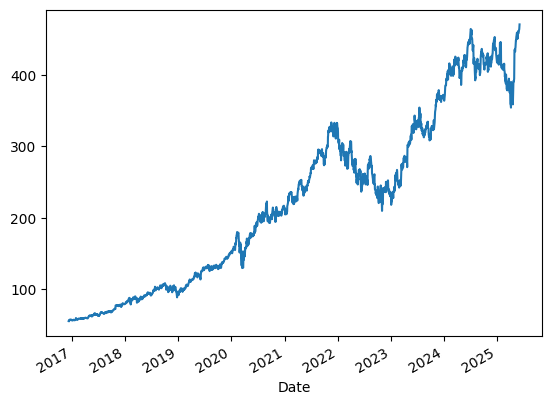

In [36]:
df_ms.MSFT.Close.plot()

### Machine Learning Classification Model

In [37]:
df_ms
df_ms.columns
df = df_ms
df.columns = [col[1]
               for col in df.columns.to_flat_index()]



In [38]:
df

,Open,High,Low,Close,Volume,Ch_tomorrow,Ch_dir
Date,,,,,,,
2016-12-08,55.341827,55.594614,54.926538,55.080013,21220800,1.549124,UP
2016-12-09,55.233482,55.964754,55.188343,55.946697,27349400,0.321699,UP
2016-12-12,55.811279,56.244624,55.721000,56.127258,20198100,1.286115,UP
2016-12-13,56.425179,57.255756,56.190452,56.858524,35718900,-0.478613,DOWN
2016-12-14,56.876585,57.282847,56.452267,56.587688,30352700,-0.159779,DOWN
...,...,...,...,...,...,...,...
2025-06-02,457.140015,462.109985,456.890015,461.970001,16626500,0.215997,UP
2025-06-03,461.470001,464.140015,460.859985,462.970001,15743800,0.194019,UP
2025-06-04,464.000000,465.690002,463.019989,463.869995,14162700,0.814659,UP


In [39]:
target = df.Ch_dir

target

Date
2016-12-08      UP
2016-12-09      UP
2016-12-12      UP
2016-12-13    DOWN
2016-12-14    DOWN
              ... 
2025-06-02      UP
2025-06-03      UP
2025-06-04      UP
2025-06-05      UP
2025-06-06    DOWN
Name: Ch_dir, Length: 2135, dtype: object

In [40]:
explanatory = df_ms.drop([('Ch_tomorrow'), ('Ch_dir')], axis=1)

explanatory

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-08,55.341827,55.594614,54.926538,55.080013,21220800
2016-12-09,55.233482,55.964754,55.188343,55.946697,27349400
2016-12-12,55.811279,56.244624,55.721000,56.127258,20198100
2016-12-13,56.425179,57.255756,56.190452,56.858524,35718900
2016-12-14,56.876585,57.282847,56.452267,56.587688,30352700
...,...,...,...,...,...
2025-06-02,457.140015,462.109985,456.890015,461.970001,16626500
2025-06-03,461.470001,464.140015,460.859985,462.970001,15743800
2025-06-04,464.000000,465.690002,463.019989,463.869995,14162700


In [41]:
print(target.dtypes)


object


In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
model_df = DecisionTreeClassifier()

In [44]:
model_df.fit(X = explanatory, y = target)

DecisionTreeClassifier()

### Visualize the model

[Text(0.47301642551727024, 0.9868421052631579, 'Close <= 224.427\ngini = 0.497\nsamples = 2135\nvalue = [980, 1155]'),
 Text(0.39614834162562573, 0.9605263157894737, 'Close <= 215.929\ngini = 0.491\nsamples = 1068\nvalue = [461, 607]'),
 Text(0.43458238357144796, 0.9736842105263157, 'True  '),
 Text(0.32580225405699986, 0.9342105263157895, 'Volume <= 44742700.0\ngini = 0.493\nsamples = 1030\nvalue = [452, 578]'),
 Text(0.2335518680364928, 0.9078947368421053, 'Volume <= 32050200.0\ngini = 0.489\nsamples = 918\nvalue = [390, 528]'),
 Text(0.12889931172291297, 0.881578947368421, 'Low <= 205.982\ngini = 0.495\nsamples = 739\nvalue = [333, 406]'),
 Text(0.09519063862425318, 0.8552631578947368, 'Volume <= 31751600.0\ngini = 0.493\nsamples = 722\nvalue = [319, 403]'),
 Text(0.0926070765380268, 0.8289473684210527, 'High <= 59.215\ngini = 0.492\nsamples = 716\nvalue = [313, 403]'),
 Text(0.027773292426933636, 0.8026315789473685, 'Close <= 58.538\ngini = 0.49\nsamples = 58\nvalue = [33, 25]'),
 

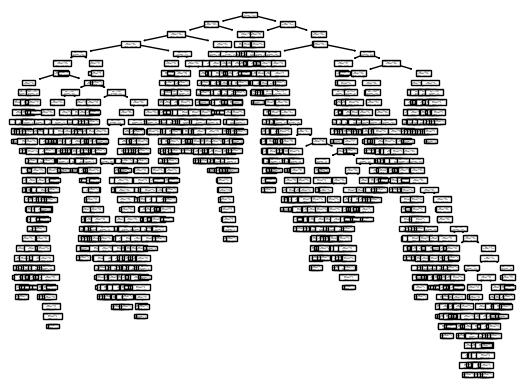

In [45]:
from sklearn.tree import plot_tree

plot_tree(decision_tree=model_df, feature_names=model_df.feature_names_in_)

### Calculate the predictions

In [46]:
y_pred = model_df.predict(X = explanatory)

In [47]:
df_pred = df_ms[('Ch_dir')].to_frame()
df_pred['Pred'] = y_pred
df_pred

,Ch_dir,Pred
Date,,
2016-12-08,UP,UP
2016-12-09,UP,UP
2016-12-12,UP,UP
2016-12-13,DOWN,DOWN
2016-12-14,DOWN,DOWN
...,...,...
2025-06-02,UP,UP
2025-06-03,UP,UP
2025-06-04,UP,UP


### Evaluate the model: compare prediction with reality

In [48]:
comp = df_pred.Ch_dir == df_pred.Pred

print(comp)


Date
2016-12-08    True
2016-12-09    True
2016-12-12    True
2016-12-13    True
2016-12-14    True
              ... 
2025-06-02    True
2025-06-03    True
2025-06-04    True
2025-06-05    True
2025-06-06    True
Length: 2135, dtype: bool


In [49]:
comp.sum()/len(comp)

np.float64(1.0)

In [50]:
model_df.score(X=explanatory, y = target)

1.0

### Create Pickle file

In [51]:
import pickle

In [52]:
model_df

DecisionTreeClassifier()

In [53]:
with open('model_dt_classification.pkl', 'wb') as f:
    pickle.dump(model_df, f) 

# Backtesting ML Classification-Based

In [54]:
with open('model_dt_classification.pkl', 'rb') as f:
    model_dt = pickle.load(f)

In [55]:
model_dt

DecisionTreeClassifier()

In [56]:
# df_ms

# df_ms.columns = [col[1] for col in df_ms.columns.to_flat_index()]

### Create your Strategy Class

In [57]:
#!pip install backtesting
from backtesting import Backtest, Strategy

/home/codespace/.python/current/lib/python3.12/site-packages/backtesting/_plotting.py:55: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support, such as old IDEs. Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [58]:
Backtest?

Init signature:
Backtest(
    data: 'pd.DataFrame',
    strategy: 'Type[Strategy]',
    *,
    cash: 'float' = 10000,
    spread: 'float' = 0.0,
    commission: 'Union[float, Tuple[float, float]]' = 0.0,
    margin: 'float' = 1.0,
    trade_on_close=False,
    hedging=False,
    exclusive_orders=False,
    finalize_trades=False,
)
Docstring:     
Backtest a particular (parameterized) strategy
on particular data.

Initialize a backtest. Requires data and a strategy to test.
After initialization, you can call method
`backtesting.backtesting.Backtest.run` to run a backtest
instance, or `backtesting.backtesting.Backtest.optimize` to
optimize it.

`data` is a `pd.DataFrame` with columns:
`Open`, `High`, `Low`, `Close`, and (optionally) `Volume`.
If any columns are missing, set them to what you have available,
e.g.

    df['Open'] = df['High'] = df['Low'] = df['Close']

The passed data frame can contain additional columns that
can be used by the strategy (e.g. sentiment info).
DataFrame inde

In [59]:
df_explanatory = df.drop(columns=['Ch_tomorrow', 'Ch_dir'])
df_explanatory

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-08,55.341827,55.594614,54.926538,55.080013,21220800
2016-12-09,55.233482,55.964754,55.188343,55.946697,27349400
2016-12-12,55.811279,56.244624,55.721000,56.127258,20198100
2016-12-13,56.425179,57.255756,56.190452,56.858524,35718900
2016-12-14,56.876585,57.282847,56.452267,56.587688,30352700
...,...,...,...,...,...
2025-06-02,457.140015,462.109985,456.890015,461.970001,16626500
2025-06-03,461.470001,464.140015,460.859985,462.970001,15743800
2025-06-04,464.000000,465.690002,463.019989,463.869995,14162700


In [60]:
explanatory_t = df_explanatory.iloc[[-1],:] # to take it data frame format put it bracket 

In [61]:
forecast_t = model_dt.predict(explanatory_t)[0] #<- it means first element
forecast_t

'DOWN'

In [62]:
# Logic of buying or selling 
list_buy_sell = []

for tomorrow_dir in df.Ch_dir:
    if tomorrow_dir == "UP":
        list_buy_sell.append(1)
    elif tomorrow_dir == "DOWN":
        list_buy_sell.append(-1)

In [65]:
# df[['Ch_dir', 'buy_sell']].head(10)

In [66]:
list_buy_sell = []
already_bought = False


for tomorrow_dir in df.Ch_dir:
    if tomorrow_dir == "UP" and already_bought == False:
        list_buy_sell.append(1)
        already_bought = True
    elif tomorrow_dir == "DOWN" and already_bought == True:
        list_buy_sell.append(-1)
        already_bought = False
    else:
        list_buy_sell.append(0)

df['buy_sell_track'] = list_buy_sell
df[['Ch_dir', 'buy_sell', 'buy_sell_track']].head(10)


KeyError: "['buy_sell'] not in index"

In [68]:
class ClassificationUP(Strategy):
    def init(self):
        self.model = model_dt
        self.already_bought = False

    def next(self):
        explanatory_t = self.data.df.iloc[[-1],:]
        forecast_t = model_dt.predict(explanatory_t)[0]

        if forecast_t == "UP" and self.already_bought == False:
            self.buy()
            self.already_bought = True
        elif forecast_t == "DOWN" and self.already_bought == True:
            self.sell()
            self.already_bought = False
        else:
            pass

### Define initial conditions

In [69]:
bt = Backtest(data= df_explanatory,
              strategy= ClassificationUP,
              cash=1000,
              commission=.002,
              exclusive_orders=True
              )

In [70]:
result = bt.run()
result

Start                     2016-12-08 00:00:00
End                       2025-06-06 00:00:00
Duration                   3102 days 00:00:00
Exposure Time [%]                    99.62529
Equity Final [$]               185050251.0482
Equity Peak [$]               190075828.11018
Commissions [$]                61580613.86864
Return [%]                     18504925.10482
Buy & Hold Return [%]               753.99399
Return (Ann.) [%]                   318.51678
Volatility (Ann.) [%]                100.8818
CAGR [%]                            167.85738
Sharpe Ratio                          3.15733
Sortino Ratio                        25.10705
Calmar Ratio                         18.21988
Alpha [%]                      18504924.99974
Beta                                  0.00014
Max. Drawdown [%]                   -17.48182
Avg. Drawdown [%]                    -1.74966
Max. Drawdown Duration       38 days 00:00:00
Avg. Drawdown Duration        7 days 00:00:00
# Trades                          

In [71]:
result.to_frame(name='Values').loc[:'Return [%]']

,Values
Start,2016-12-08 00:00:00
End,2025-06-06 00:00:00
Duration,3102 days 00:00:00
Exposure Time [%],99.625293
Equity Final [$],185050251.0482
Equity Peak [$],190075828.110182
Commissions [$],61580613.868641
Return [%],18504925.10482


### Machine Learning Regression Model

In [83]:
df = df.drop('buy_sell_track', axis=1).copy()

In [82]:
df

,Open,High,Low,Close,Volume,Ch_tomorrow,Ch_dir,buy_sell_track
Date,,,,,,,,
2016-12-08,55.341827,55.594614,54.926538,55.080013,21220800,1.549124,UP,1
2016-12-09,55.233482,55.964754,55.188343,55.946697,27349400,0.321699,UP,0
2016-12-12,55.811279,56.244624,55.721000,56.127258,20198100,1.286115,UP,0
2016-12-13,56.425179,57.255756,56.190452,56.858524,35718900,-0.478613,DOWN,-1
2016-12-14,56.876585,57.282847,56.452267,56.587688,30352700,-0.159779,DOWN,0
...,...,...,...,...,...,...,...,...
2025-06-02,457.140015,462.109985,456.890015,461.970001,16626500,0.215997,UP,0
2025-06-03,461.470001,464.140015,460.859985,462.970001,15743800,0.194019,UP,0
2025-06-04,464.000000,465.690002,463.019989,463.869995,14162700,0.814659,UP,0


In [ ]:
df

,Open,High,Low,Close,Volume,Ch_tomorrow,Ch_dir
Date,,,,,,,
2016-12-08,55.341827,55.594614,54.926538,55.080013,21220800,1.549124,UP
2016-12-09,55.233482,55.964754,55.188343,55.946697,27349400,0.321699,UP
2016-12-12,55.811279,56.244624,55.721000,56.127258,20198100,1.286115,UP
2016-12-13,56.425179,57.255756,56.190452,56.858524,35718900,-0.478613,DOWN
2016-12-14,56.876585,57.282847,56.452267,56.587688,30352700,-0.159779,DOWN
...,...,...,...,...,...,...,...
2025-06-02,457.140015,462.109985,456.890015,461.970001,16626500,0.215997,UP
2025-06-03,461.470001,464.140015,460.859985,462.970001,15743800,0.194019,UP
2025-06-04,464.000000,465.690002,463.019989,463.869995,14162700,0.814659,UP


In [89]:
target = df.Ch_tomorrow

explanatory = df[['Open', 'High', 'Low', 'Close', 'Volume']]

In [96]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor(max_depth=15)

In [97]:
model_dt.fit(X=explanatory, y=target)

DecisionTreeRegressor(max_depth=15)

[Text(0.8984605943834459, 0.96875, 'Volume <= 92951148.0\nsquared_error = 3.035\nsamples = 2135\nvalue = 0.085'),
 Text(0.8568874049831081, 0.90625, 'Volume <= 91578148.0\nsquared_error = 2.939\nsamples = 2131\nvalue = 0.078'),
 Text(0.877673999683277, 0.9375, 'True  '),
 Text(0.8535090266047297, 0.84375, 'Volume <= 87003952.0\nsquared_error = 2.799\nsamples = 2130\nvalue = 0.086'),
 Text(0.7737410261824325, 0.78125, 'Volume <= 78979100.0\nsquared_error = 2.774\nsamples = 2128\nvalue = 0.082'),
 Text(0.624340160472973, 0.71875, 'Volume <= 78726700.0\nsquared_error = 2.758\nsamples = 2119\nvalue = 0.09'),
 Text(0.6209617820945946, 0.65625, 'Volume <= 46526000.0\nsquared_error = 2.728\nsamples = 2118\nvalue = 0.086'),
 Text(0.45476140202702703, 0.59375, 'Volume <= 35868700.0\nsquared_error = 2.408\nsamples = 1984\nvalue = 0.11'),
 Text(0.3063766891891892, 0.53125, 'Volume <= 33468450.0\nsquared_error = 2.05\nsamples = 1792\nvalue = 0.058'),
 Text(0.21083192567567569, 0.46875, 'High <= 42

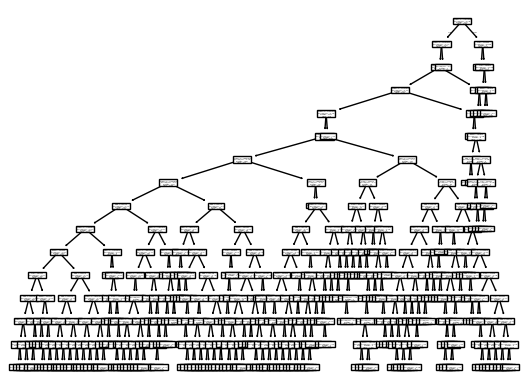

In [98]:
plot_tree(decision_tree=model_dt, feature_names=model_dt.feature_names_in_)

In [103]:
y_pred = model_dt.predict(X=explanatory)

df_pred = df[['Ch_tomorrow']].copy()
df_pred['pred'] = y_pred
df_pred


,Ch_tomorrow,pred
Date,,
2016-12-08,1.549124,0.120741
2016-12-09,0.321699,0.562618
2016-12-12,1.286115,0.120741
2016-12-13,-0.478613,-0.199913
2016-12-14,-0.159779,0.147998
...,...,...
2025-06-02,0.215997,-0.235221
2025-06-03,0.194019,-0.235221
2025-06-04,0.814659,-0.235221


In [105]:
result = model_dt.score (X=explanatory, y=target)

result

0.42972662929453354

In [112]:
df_pred['error'] = df_pred.pred - df_pred.Ch_tomorrow
df_pred.error.sum().round(2)

np.float64(-0.0)

In [114]:
df_pred['error2'] = df_pred.error ** 2
sse = df_pred.error2.sum()
sse

np.float64(3694.686908380775)

In [116]:
mse = df_pred.error2.mean()
mse

np.float64(1.7305325097802224)

In [118]:
rmse = np.sqrt(mse)
rmse

np.float64(1.3154970580659702)

<Axes: >

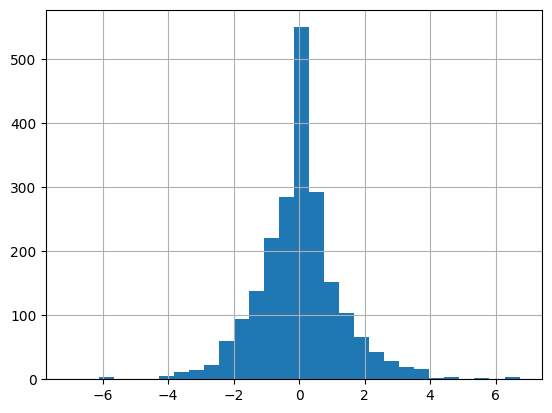

In [121]:
df_pred.error.hist(bins=30)

In [122]:
# save the model

with open('model_dt_regression.pkl', 'wb') as f:
    pickle.dump(model_dt, f)